# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import folium
from folium.plugins import HeatMap

In [3]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Data Preparation and Cleaning

In [5]:
df = pd.read_csv('US_Accidents.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe(include='all')

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,2906610,2.906610e+06,2906610,2906610,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,2906610,...,2906610,2906610,2906610,2906610,2906610,2906610,2906500,2906500,2906500,2906500
unique,2906610,NaN,2394692,2517424,NaN,NaN,NaN,NaN,NaN,1484192,...,2,2,2,2,2,1,2,2,2,2
top,A-1,NaN,2020-12-16 13:53:25,2017-05-15 15:22:55,NaN,NaN,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,NaN,109,73,NaN,NaN,NaN,NaN,NaN,2709,...,2906468,2848700,2861156,2905303,2452945,2906610,1941068,2073629,2212270,2321705
mean,NaN,2.288649e+00,NaN,NaN,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.541618e-01,NaN,NaN,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000e+00,NaN,NaN,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000e+00,NaN,NaN,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

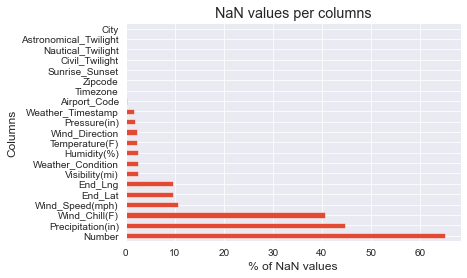

In [9]:
missing_per = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
missing_per = missing_per[missing_per != 0]

missing_per.plot(kind='barh')
plt.title('NaN values per columns')
plt.xlabel('% of NaN values')
plt.ylabel('Columns')
plt.show()

In [10]:
df = df.drop(['ID', 'Wind_Chill(F)', 'Pressure(in)', 'Number', 'End_Lng', 'End_Lat', 'Wind_Speed(mph)'], axis=1)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,...,False,False,False,False,False,False,Day,Day,Day,Day
1,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,Los Gatos,...,False,False,False,False,False,False,Night,Night,Night,Night
3,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,...,False,False,False,False,True,False,Day,Day,Day,Day
4,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,Fort Lauderdale,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
## No Data about New York
'NY' in df['State']

False

# Exploratory Analysis and Visualization

## States column

In [12]:
len(df.State.unique())

49

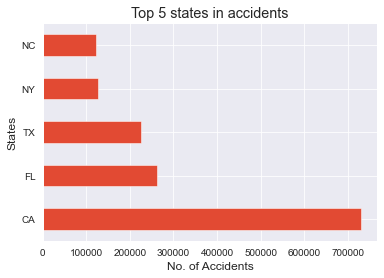

In [13]:
accidents_states = df['State'].value_counts()
accidents_states[:5].plot(kind='barh')
plt.title('Top 5 states in accidents')
plt.xlabel('No. of Accidents')
plt.ylabel('States')
plt.show()

## City column

In [14]:
len(df.City.unique())

11790

In [15]:
cities_by_accident = df['City'].value_counts()
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

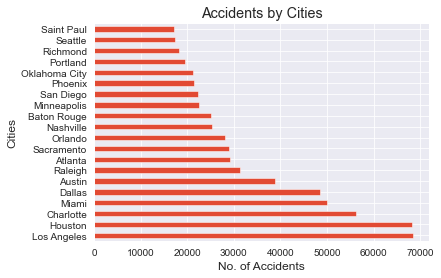

In [16]:
cities_by_accident[:20].plot(kind='barh')
plt.title('Accidents by Cities')
plt.xlabel('No. of Accidents')
plt.ylabel('Cities')
plt.show()

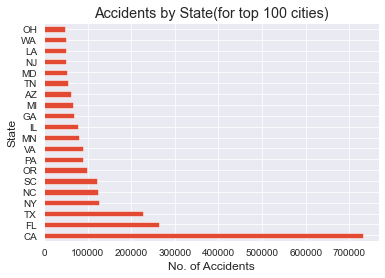

In [17]:
temp = df['City'].value_counts().reset_index()
top100_cities = temp[:100]['index'].tolist()
top100_cities_df = df[df['City'].isin(top100_cities)]
top100_cities_state = df['State'].value_counts()

top100_cities_state[:20].plot(kind='barh')
plt.title('Accidents by State(for top 100 cities)')
plt.xlabel('No. of Accidents')
plt.ylabel('State')
plt.show()

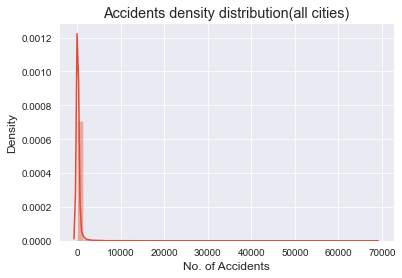

In [18]:
sns.distplot(cities_by_accident)
plt.title('Accidents density distribution(all cities)')
plt.xlabel('No. of Accidents')
plt.ylabel('Density')
plt.show()

In [19]:
high_accidents_cities = cities_by_accident[cities_by_accident >= 2000]
low_accidents_cities = cities_by_accident[cities_by_accident < 2000]

In [20]:
high = (len(high_accidents_cities)/len(cities_by_accident))*100
low = (len(low_accidents_cities)/len(cities_by_accident))*100
print('Percentage of high accidents cities =', "{:.2f}".format(high), '%')
print('Percentage of low Accidents cities =', "{:.2f}".format(low), '%')

Percentage of high accidents cities = 1.89 %
Percentage of low Accidents cities = 98.11 %


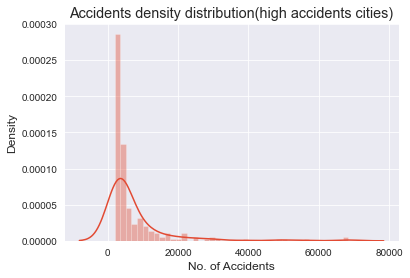

In [21]:
sns.distplot(high_accidents_cities)
plt.title('Accidents density distribution(high accidents cities)')
plt.xlabel('No. of Accidents')
plt.ylabel('Density')
plt.show()

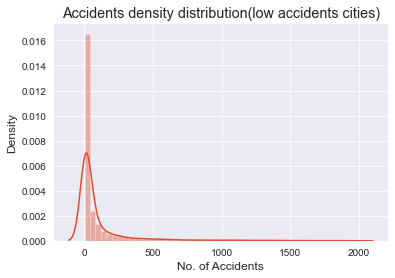

In [22]:
sns.distplot(low_accidents_cities)
plt.title('Accidents density distribution(low accidents cities)')
plt.xlabel('No. of Accidents')
plt.ylabel('Density')
plt.show()

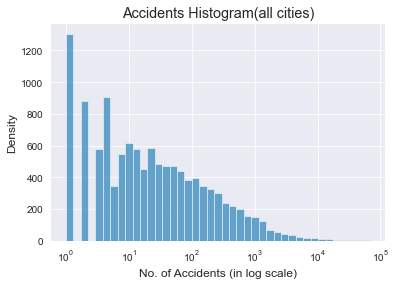

In [23]:
sns.histplot(cities_by_accident, log_scale=True)
plt.title('Accidents Histogram(all cities)')
plt.xlabel('No. of Accidents (in log scale)')
plt.ylabel('Density')
plt.show()

Exponential Descrease

In [24]:
accidents_less = len(cities_by_accident[cities_by_accident <= 10])
print('No. of cities with <= 10 accidents =', accidents_less)

No. of cities with <= 10 accidents = 5005


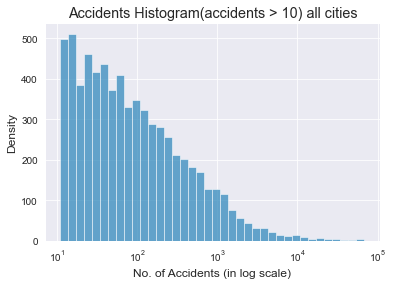

In [25]:
cities_by_accident = cities_by_accident[cities_by_accident > 10]

sns.histplot(cities_by_accident, log_scale=True)
plt.title('Accidents Histogram(accidents > 10) all cities')
plt.xlabel('No. of Accidents (in log scale)')
plt.ylabel('Density')
plt.show()

## Start Time Column

In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

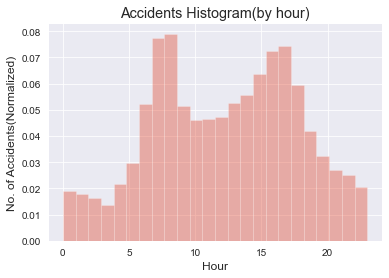

In [27]:
hour_accidents = df['Start_Time'].dt.hour
sns.distplot(hour_accidents, bins=24, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by hour)')
plt.xlabel('Hour')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

* 7-10 AM more accidents probably because people in hurry to get to work
* 4-8 PM more accidents probably because people going to home from work

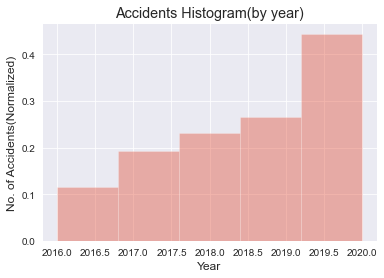

In [28]:
year_accidents = df['Start_Time'].dt.year
sns.distplot(year_accidents, bins=5, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by year)')
plt.xlabel('Year')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Kind of exponential increase in accidents over the years

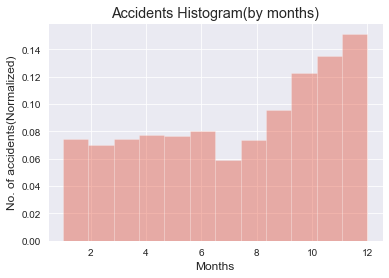

In [29]:
month_accidents = df['Start_Time'].dt.month
sns.distplot(month_accidents, bins=12, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by months)')
plt.xlabel('Months')
plt.ylabel('No. of accidents(Normalized)')
plt.show()

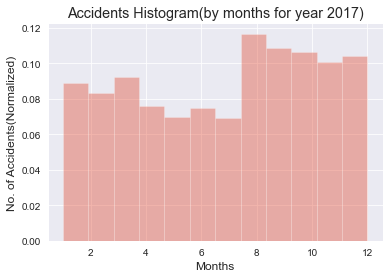

In [30]:
accidents_2017 = df[df['Start_Time'].dt.year == 2017]
month_accidents2017 = accidents_2017['Start_Time'].dt.month
sns.distplot(month_accidents2017, bins=12, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by months for year 2017)')
plt.xlabel('Months')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

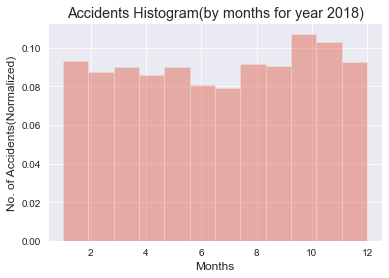

In [31]:
accidents_2018 = df[df['Start_Time'].dt.year == 2018]
month_accidents2018 = accidents_2018['Start_Time'].dt.month
sns.distplot(month_accidents2018, bins=12, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by months for year 2018)')
plt.xlabel('Months')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

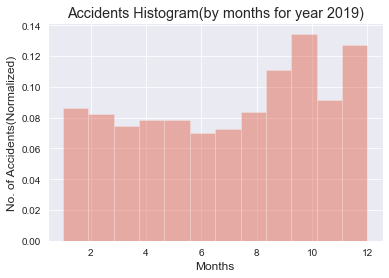

In [32]:
accidents_2019 = df[df['Start_Time'].dt.year == 2019]
month_accidents2019 = accidents_2019['Start_Time'].dt.month
sns.distplot(month_accidents2019, bins=12, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by months for year 2019)')
plt.xlabel('Months')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Little bit more accidents around december probably because of icey roads

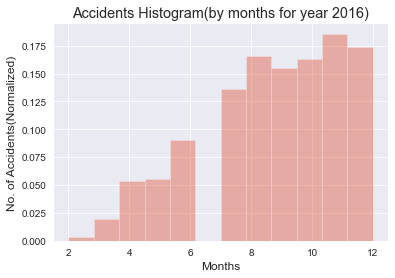

In [33]:
accidents_2016 = df[df['Start_Time'].dt.year == 2016]
month_accidents2016 = accidents_2016['Start_Time'].dt.month
sns.distplot(month_accidents2016, bins=12, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by months for year 2016)')
plt.xlabel('Months')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Might be some missing data

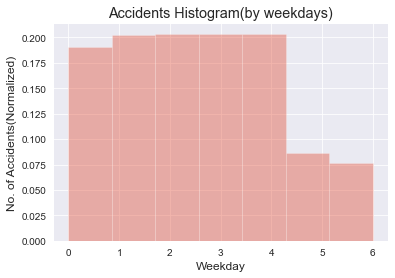

In [34]:
weekday_accidents = df['Start_Time'].dt.dayofweek

sns.distplot(weekday_accidents, bins=7, kde=False,norm_hist=True)
plt.title('Accidents Histogram(by weekdays)')
plt.xlabel('Weekday')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Less accidents on weekend probably because fewer people travelling for work 

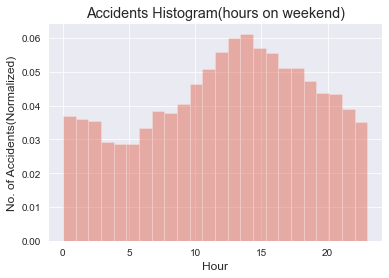

In [35]:
weenkend_accidents = df.Start_Time[df['Start_Time'].dt.dayofweek.isin([5,6])]
weenkend_accidents = weenkend_accidents.dt.hour

sns.distplot(weenkend_accidents, bins=24, kde=False,norm_hist=True)
plt.title('Accidents Histogram(hours on weekend)')
plt.xlabel('Hour')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Peak at 1-5 PM

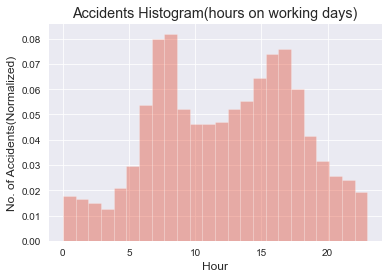

In [36]:
working_day_accidents = df.Start_Time[df['Start_Time'].dt.dayofweek.isin([0,1,2,3,4,5])]
working_day_accidents = working_day_accidents.dt.hour

sns.distplot(working_day_accidents, bins=24, kde=False,norm_hist=True)
plt.title('Accidents Histogram(hours on working days)')
plt.xlabel('Hour')
plt.ylabel('No. of Accidents(Normalized)')
plt.show()

Peak at 7-10 AM and 4-8 PM

## Severity column

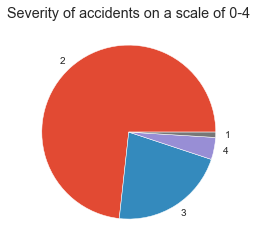

In [37]:
df['Severity'].value_counts().plot(kind='pie')
plt.title('Severity of accidents on a scale of 0-4')
plt.ylabel('')
plt.show()

## Start Latitude and Start Longitute column

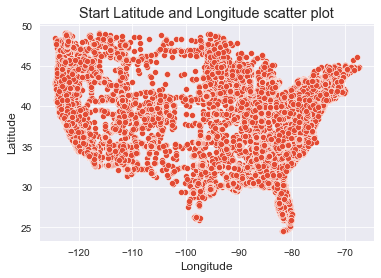

In [38]:
sample_df1 = df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df1['Start_Lng'], y=sample_df1['Start_Lat'])
plt.title('Start Latitude and Longitude scatter plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

More density of accidents along the coasts of country than center probably because of more population

In [39]:
sample_df2 = df.sample(int(0.001*len(df)))
heatmap_data = list(zip(list(sample_df2 ['Start_Lat']), list(sample_df2['Start_Lng'])))

map = folium.Map()
HeatMap(heatmap_data).add_to(map)
map